# Day 7 Regression with a categorical variable

In this data we are looking at the effect of various categorical variables on a continuous quantitative variable. **NOTE: The data in this dataset is not real. It is created for an educational setting.**

In [4]:
library(dplyr)
library(ggplot2)

In [5]:
exams<-read.csv("exams.csv")

Let's look at the data using the ```head``` and ```str``` commands.

In [6]:
head(exams)
str(exams)

gender,race,parentaleducation,lunch,testprep,mathscore,readingscore,writingscore
male,group C,bachelor's degree,free/reduced,none,61,65,56
female,group B,some high school,standard,none,81,88,87
male,group B,master's degree,standard,none,85,74,75
male,group C,associate's degree,standard,completed,94,91,90
female,group B,high school,free/reduced,none,58,70,65
male,group D,associate's degree,standard,none,71,65,65


'data.frame':	1000 obs. of  8 variables:
 $ gender           : Factor w/ 2 levels "female","male": 2 1 2 2 1 2 1 1 1 1 ...
 $ race             : Factor w/ 5 levels "group A","group B",..: 3 2 2 3 2 4 3 3 4 4 ...
 $ parentaleducation: Factor w/ 6 levels "associate's degree",..: 2 6 4 1 3 1 6 1 6 5 ...
 $ lunch            : Factor w/ 2 levels "free/reduced",..: 1 2 2 2 1 2 2 2 1 1 ...
 $ testprep         : Factor w/ 2 levels "completed","none": 2 2 2 1 2 2 2 1 2 2 ...
 $ mathscore        : int  61 81 85 94 58 71 63 81 40 62 ...
 $ readingscore     : int  65 88 74 91 70 65 72 92 50 74 ...
 $ writingscore     : int  56 87 75 90 65 65 73 92 54 73 ...


Let's start by investigating the math scores. We would be interested to see if there are any effects by these categorical variables. For ease, let's focus on ```gender```, ```lunch```, and ```testprep```. The easiest way to see if these variables would be important is to make displays of data that would allow our eye to see the relative impact of these variables. Let's do that now, for instance

```
ggplot(data=exams, aes(x=gender, y=mathscore, group=gender))+geom_boxplot()
```



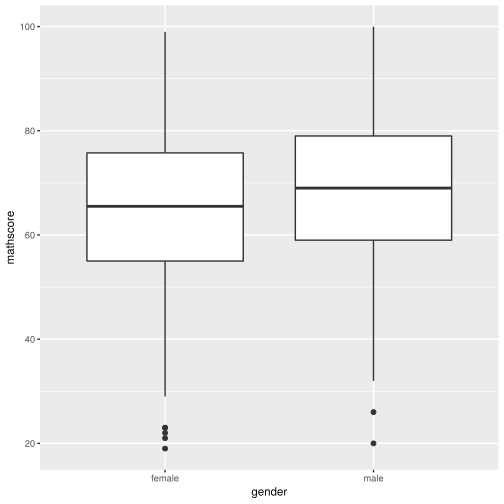

In [7]:
ggplot(data=exams, aes(x=gender, y=mathscore, group=gender))+geom_boxplot()

We can also use the ```summarize``` function. The code below creates groups of the exam data by gender then calculates the mean, standard deviation, and the number of observations in that group.

```
exams %>%
  group_by(gender) %>%
  summarise(mean_gender = mean(mathscore), sd_gender = sd(mathscore), n = n())

```

In [14]:
exams %>%
  group_by(gender) %>%
  summarise(mean_gender = mean(mathscore), sd_gender = sd(mathscore), n = n())

gender,mean_gender,sd_gender,n
female,64.77011,15.07158,522
male,69.11925,14.68853,478


**Question 1** Describe in your own words the difference in math scores between boys and girls. Use the box plot and the summary data in your answer.

**Write your answer here**

## Using regression

We can also use the tools of regression to look at the effect of gender. To do this we will need to change the data so that gender can be considered a numerical variable. We will do this by introducing a *dummy variable* that indicates has a valus of 1 if the observation is that of a boy, and 0 if it is the value of a girl.

```
exams<-exams %>%
    mutate(numGender=ifelse(gender=="male", 1, 0))
simpleGender<-lm(mathscore~numGender, data=exams)
summary(simpleGender)
```


In [12]:
exams<-exams %>%
    mutate(numGender=ifelse(gender=="male", 1, 0))
simpleGender<-lm(mathscore~numGender, data=exams)
summary(simpleGender)


Call:
lm(formula = mathscore ~ numGender, data = exams)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.119 -10.119   0.230   9.968  34.230 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  64.7701     0.6517  99.386  < 2e-16 ***
numGender     4.3491     0.9426   4.614 4.47e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.89 on 998 degrees of freedom
Multiple R-squared:  0.02088,	Adjusted R-squared:  0.0199 
F-statistic: 21.29 on 1 and 998 DF,  p-value: 4.467e-06


**Question** What does the slope in this regression represent? Is it greater, lesser, or equal to effect than what was indicated in the difference of the means above?

Let's dig deeper into other variables. Let's look at the ```lunch``` variable. And do so in the same way. 

We can do this all at once with the following code copied from above, and then edited to indicate ```lunch```.

```
ggplot(data=exams, aes(x=lunch, y=mathscore, group=lunch))+geom_boxplot()
exams %>%
  group_by(lunch) %>%
  summarise(mean_lunch = mean(mathscore), sd_lunch = sd(mathscore), n = n())
exams<-exams %>%
    mutate(numLunch=ifelse(lunch=="free/reduced", 1, 0))
simpleLunch<-lm(mathscore~numLunch, data=exams)
summary(simpleLunch)
```

lunch,mean_lunch,sd_lunch,n
free/reduced,58.37101,13.85583,345
standard,71.31450,13.66256,655



Call:
lm(formula = mathscore ~ numLunch, data = exams)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.315  -8.371  -0.315   9.685  37.629 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.3145     0.5365  132.94   <2e-16 ***
numLunch    -12.9435     0.9133  -14.17   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.73 on 998 degrees of freedom
Multiple R-squared:  0.1675,	Adjusted R-squared:  0.1667 
F-statistic: 200.8 on 1 and 998 DF,  p-value: < 2.2e-16


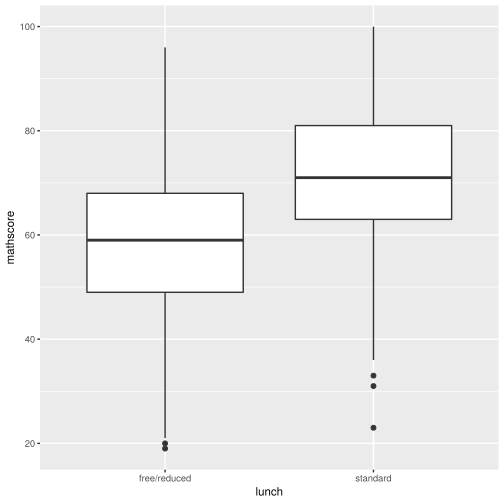

In [15]:
ggplot(data=exams, aes(x=lunch, y=mathscore, group=lunch))+geom_boxplot()
exams %>%
  group_by(lunch) %>%
  summarise(mean_lunch = mean(mathscore), sd_lunch = sd(mathscore), n = n())
exams<-exams %>%
    mutate(numLunch=ifelse(lunch=="free/reduced", 1, 0))
simpleLunch<-lm(mathscore~numLunch, data=exams)
summary(simpleLunch)

**Question** What we have learned about the effect of free/reduced lunch has on the expected math scores of students.

**Question** Run a similar analysis on testprep. Discuss effect of test prep on math scores.

testprep,mean_testprep,sd_testprep,n
completed,68.94817,14.70382,328
none,65.82440,15.10674,672



Call:
lm(formula = mathscore ~ numtestprep, data = exams)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.948  -9.948   1.052  10.052  34.176 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  65.8244     0.5777 113.941  < 2e-16 ***
numtestprep   3.1238     1.0087   3.097  0.00201 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.98 on 998 degrees of freedom
Multiple R-squared:  0.009518,	Adjusted R-squared:  0.008525 
F-statistic:  9.59 on 1 and 998 DF,  p-value: 0.002011


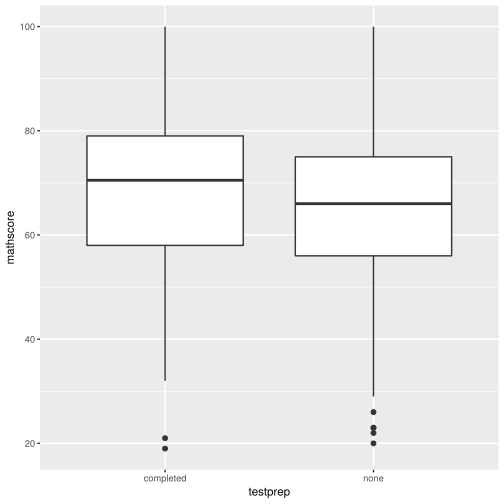

In [16]:
ggplot(data=exams, aes(x=testprep, y=mathscore, group=testprep))+geom_boxplot()
exams %>%
  group_by(testprep) %>%
  summarise(mean_testprep = mean(mathscore), sd_testprep = sd(mathscore), n = n())
exams<-exams %>%
    mutate(numtestprep=ifelse(testprep=="completed", 1, 0))
simpletestprep<-lm(mathscore~numtestprep, data=exams)
summary(simpletestprep)

## Putting it together with Multilinear regression

It is possible that there are connections between the effects of these variables. For instance, between testprep and lunch. Both of these can be connected to family resources. Using multilinear regression we can look to separate the effects of those. Let's create a model that incorporates all the variables we have so far. 

```
mult1<-lm(mathscore~numGender+numLunch+numtestprep, data=exams)
summary(mult1)
```

In [20]:
mult1<-lm(mathscore~numGender+numLunch+numtestprep+race, data=exams)
summary(mult1)


Call:
lm(formula = mathscore ~ numGender + numLunch + numtestprep + 
    race, data = exams)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.816  -8.484   0.531   9.644  34.644 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  65.7375     1.5015  43.781  < 2e-16 ***
numGender     3.9202     0.8226   4.766 2.16e-06 ***
numLunch    -13.1928     0.8666 -15.225  < 2e-16 ***
numtestprep   3.3591     0.8768   3.831 0.000135 ***
racegroup B  -0.0154     1.6549  -0.009 0.992575    
racegroup C   0.8117     1.5649   0.519 0.604068    
racegroup D   3.3008     1.5823   2.086 0.037227 *  
racegroup E  12.0787     1.7979   6.718 3.10e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.98 on 992 degrees of freedom
Multiple R-squared:  0.2609,	Adjusted R-squared:  0.2556 
F-statistic: 50.01 on 7 and 992 DF,  p-value: < 2.2e-16


**Question** Do these results support the theory that there is a connection between the testprep and lunch variables?

Try this linear regression with the categorical variables. 

```
mult2<-lm(mathscore~gender+lunch+testprep, data=exams)
summary(mult2)

```

In [21]:
mult2<-lm(mathscore~gender+lunch+testprep, data=exams)
summary(mult2)


Call:
lm(formula = mathscore ~ gender + lunch + testprep, data = exams)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.218  -9.218   0.193   9.701  33.693 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    58.7656     1.0177  57.744  < 2e-16 ***
gendermale      4.0819     0.8547   4.776 2.06e-06 ***
lunchstandard  12.9108     0.8983  14.373  < 2e-16 ***
testprepnone   -3.4588     0.9093  -3.804 0.000151 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.5 on 996 degrees of freedom
Multiple R-squared:  0.1972,	Adjusted R-squared:  0.1948 
F-statistic: 81.58 on 3 and 996 DF,  p-value: < 2.2e-16


**Question** How is this different from what we have done above? 

## You try

Find the effects of the ```lunch```, ```gender```, and ```testprep``` on writing score. **Question** Describe the quantitative expected effect of each variable on reading scores. 

In [22]:
mult3<-lm(readingscore~gender+lunch+testprep, data=exams)
summary(mult3)


Call:
lm(formula = readingscore ~ gender + lunch + testprep, data = exams)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.300  -8.544   0.247   8.602  33.087 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    71.8621     0.9932  72.357  < 2e-16 ***
gendermale     -8.3878     0.8341 -10.056  < 2e-16 ***
lunchstandard   8.5474     0.8766   9.751  < 2e-16 ***
testprepnone   -5.1090     0.8874  -5.757 1.14e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.17 on 996 degrees of freedom
Multiple R-squared:  0.1833,	Adjusted R-squared:  0.1809 
F-statistic: 74.53 on 3 and 996 DF,  p-value: < 2.2e-16


**Question** A friend is considering taking a test prep course to improve their reading scores. Their current score is a 58. They feel that they need at least a 65 to have a chance at their goals. Is such a gain likely given the data here?